Data for 2018-2030 with Flight Information
    Year  IndiGo_Stock_Price  InFlightFoodIndex  Employees  Profit  Flights
0   2018                1200                100        900  400000   4000.0
1   2019                1400                105       1000  450000   4000.0
2   2020                1500                110       1100  500000   3000.0
3   2021                1600                115       1150  520000   3500.0
4   2022                1550                120       1200  540000   4000.0
5   2023                1700                125       1250  560000   4000.0
6   2024                1750                130       1300  580000   4000.0
7   2025                1800                135       1350  600000   4000.0
8   2026                1850                140       1400  620000   4000.0
9   2027                1900                145       1450  640000   4000.0
10  2028                1950                150       1500  660000   4000.0
11  2029                2000                1

C:\Users\Aiswarya\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


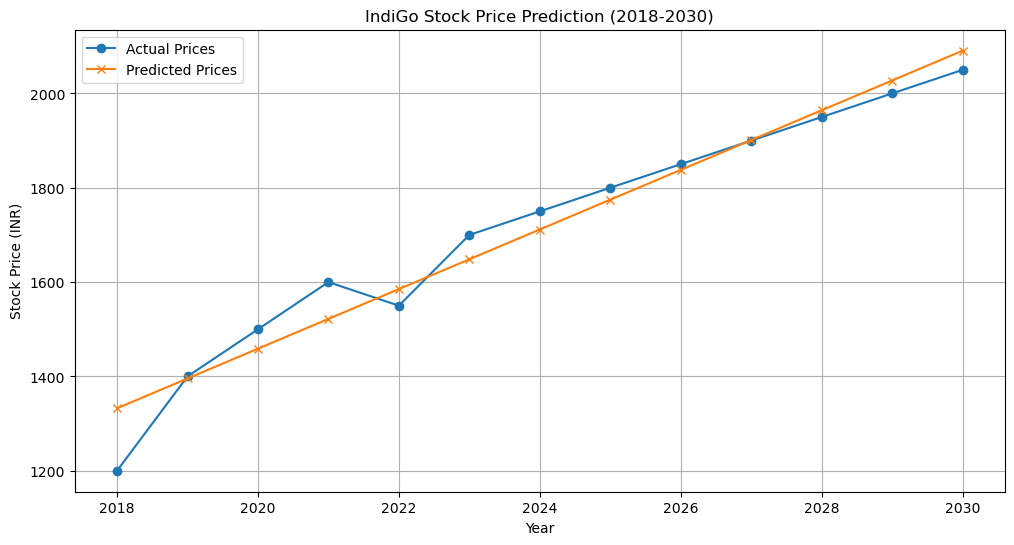

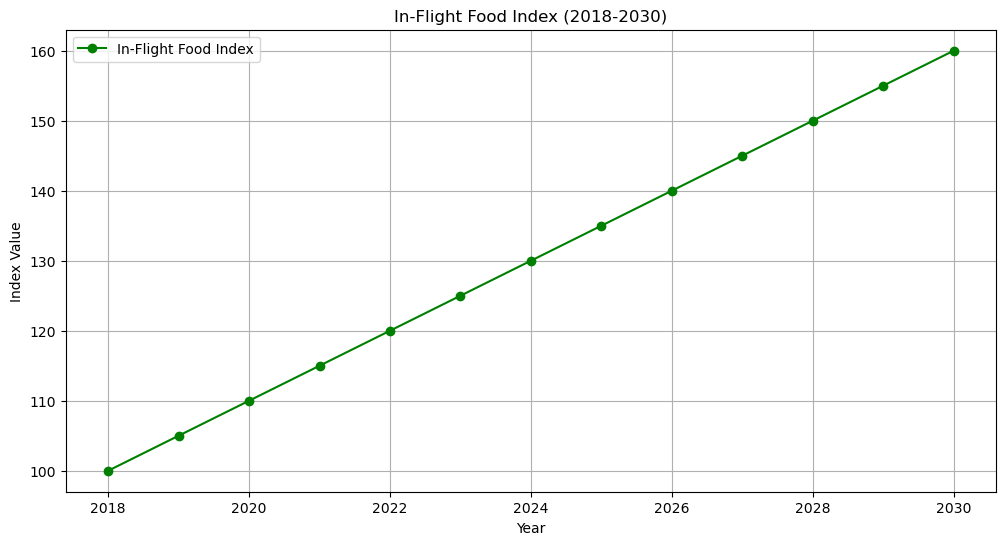

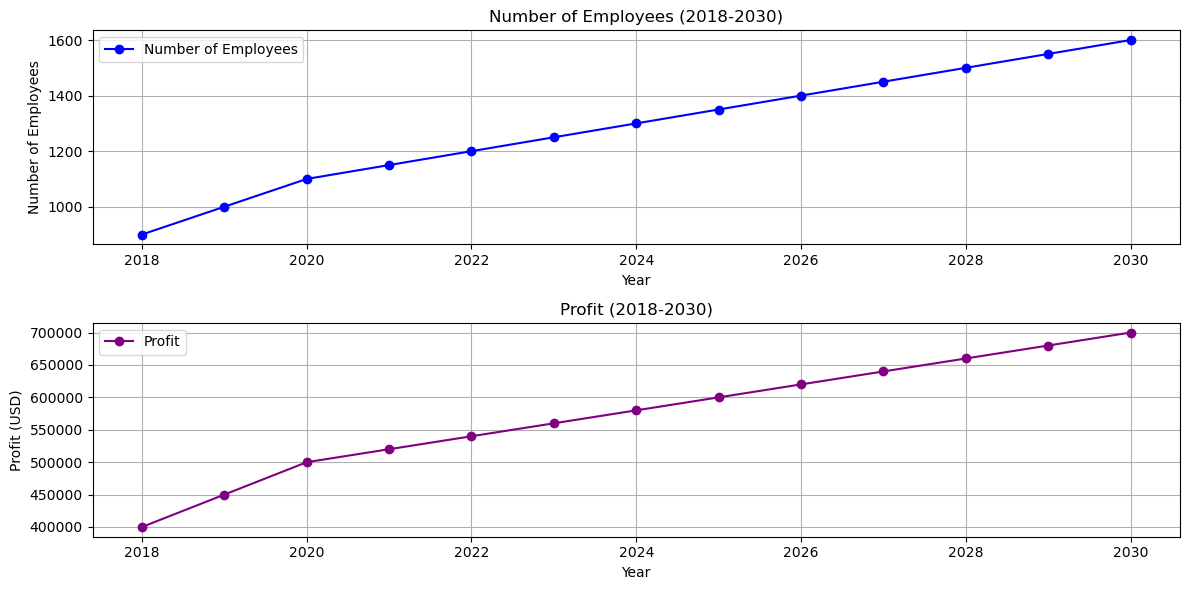

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data for IndiGo stock price prediction, In-Flight Food Index, number of employees, and profit
data = {
    'Year': list(range(2018, 2031)),
    'IndiGo_Stock_Price': [1200, 1400, 1500, 1600, 1550, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050],
    'InFlightFoodIndex': [100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160],
    'Employees': [900, 1000, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600],
    'Profit': [400000, 450000, 500000, 520000, 540000, 560000, 580000, 600000, 620000, 640000, 660000, 680000, 700000]
}

# Create a DataFrame from the sample data
df = pd.DataFrame(data)

# Adding data for flight decline during COVID times in 2020 and 2021
df.loc[df['Year'] == 2020, 'Flights'] = 3000  # Example: 3000 flights in 2020 (COVID impact)
df.loc[df['Year'] == 2021, 'Flights'] = 3500  # Example: 3500 flights in 2021 (COVID recovery)

# Fill NaN values for non-COVID years with a base value
df['Flights'].fillna(4000, inplace=True)  # Example: 4000 flights in non-COVID years

# Display the data including flight information as a table
print("Data for 2018-2030 with Flight Information")
print(df)

# Splitting data into features (X) and target (y) for IndiGo stock price prediction
X = df[['Year']]
y = df['IndiGo_Stock_Price']

# Create and train a linear regression model for IndiGo stock price prediction
model = LinearRegression()
model.fit(X, y)

# Predicting IndiGo stock prices for the years 2018 to 2030
years_to_predict = np.arange(2018, 2031).reshape(-1, 1)
predicted_prices = model.predict(years_to_predict)

# Create a DataFrame for the IndiGo stock price predictions
predictions_df = pd.DataFrame({
    'Year': years_to_predict.flatten(),
    'Predicted_IndiGo_Stock_Price': predicted_prices
})

# Display the IndiGo stock price predictions as a table
print("\nIndiGo Stock Price Prediction for 2018-2030")
print(predictions_df)

# Plotting the IndiGo stock price predictions
plt.figure(figsize=(12, 6))
plt.title('IndiGo Stock Price Prediction (2018-2030)')
plt.xlabel('Year')
plt.ylabel('Stock Price (INR)')
plt.plot(df['Year'], df['IndiGo_Stock_Price'], marker='o', label='Actual Prices')
plt.plot(predictions_df['Year'], predictions_df['Predicted_IndiGo_Stock_Price'], marker='x', label='Predicted Prices')
plt.legend()
plt.grid(True)

# Display the In-Flight Food Index data as a table
print("\nIn-Flight Food Index for 2018-2030")
print(df[['Year', 'InFlightFoodIndex']])

# Plotting the In-Flight Food Index
plt.figure(figsize=(12, 6))
plt.title('In-Flight Food Index (2018-2030)')
plt.xlabel('Year')
plt.ylabel('Index Value')
plt.plot(df['Year'], df['InFlightFoodIndex'], marker='o', color='green', label='In-Flight Food Index')
plt.legend()
plt.grid(True)

# Display the number of employees and profit as tables
print("\nNumber of Employees and Profit for 2018-2030")
print(df[['Year', 'Employees', 'Profit']])

# Plotting the number of employees and profit
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Number of Employees (2018-2030)')
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.plot(df['Year'], df['Employees'], marker='o', color='blue', label='Number of Employees')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.title('Profit (2018-2030)')
plt.xlabel('Year')
plt.ylabel('Profit (USD)')
plt.plot(df['Year'], df['Profit'], marker='o', color='purple', label='Profit')
plt.legend()
plt.grid(True)

plt.tight_layout()

plt.show()
